In [1]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 default 값을 설정해주세요
    return 0 if x<threshold else 1

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

In [3]:
# import os
# img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
# ax = plot_and_visulize(img_path, binary_step)
# ax.show()

In [4]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.round = np.vectorize(round)

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(self.round(pred)==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

In [5]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax
from math import exp
def segmoid(x):
    return 1 / (exp(-x) + 1)

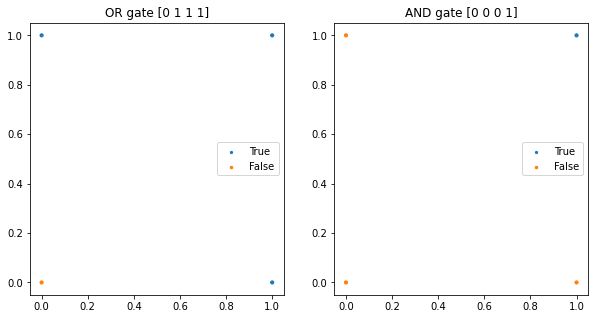

In [6]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [7]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.39194202, 0.09754152]), array([-0.08514776]))
999th epoch, accuracy : 1.0
(array([0.39399863, 0.25169775]), array([-0.39866207]))


[[0.   0.  ]
 [0.   0.01]
 [0.   0.02]
 ...
 [1.   0.98]
 [1.   0.99]
 [1.   1.  ]]


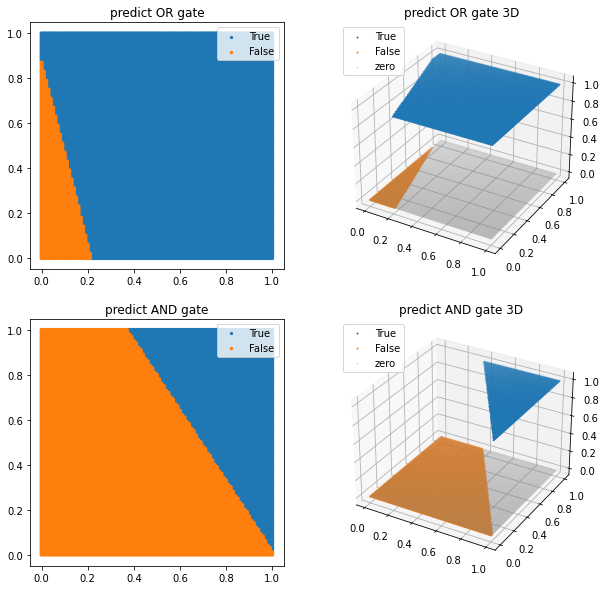

In [8]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)
print(test_X)
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

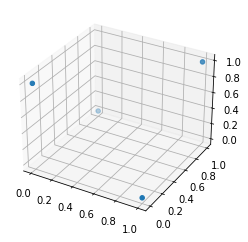

In [19]:
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:,0],X[:,1],[[1,0],[0,1]])


In [12]:
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

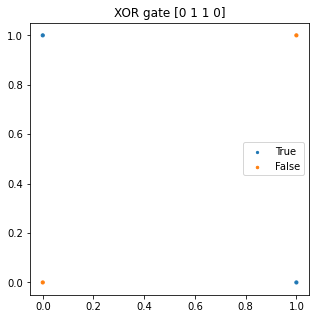

In [9]:
# XOR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1 ^ x2 for x1,x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

999th epoch, accuracy : 0.25
(array([-0.0163166 , -0.01979774]), array([0.01073355]))


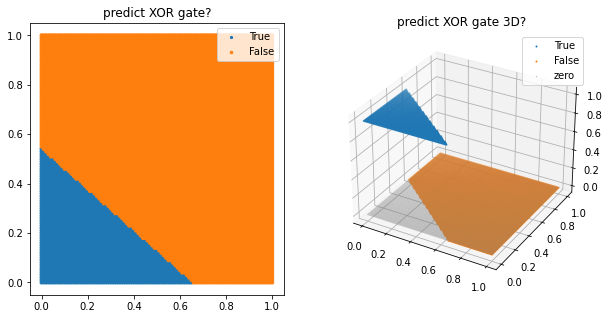

In [10]:
# XOR gate가 풀릴까?
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()